In [1]:
import cv2 as cv
import numpy as np

In [32]:
cap = cv.VideoCapture("Video2_Clip.avi")
cap.set(cv.CAP_PROP_POS_MSEC, 7000)
rt, img1 = cap.read()

bg = cv.imread("bg.jpg")

In [3]:
import matplotlib.pyplot as plt

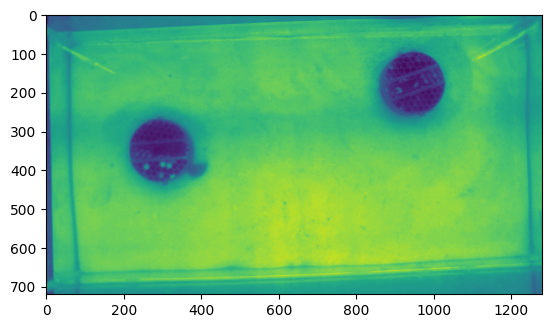

In [33]:
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
plt.imshow(img1)

In [34]:
bg = cv.cvtColor(bg, cv.COLOR_BGR2GRAY)
delta = cv.absdiff(img1, bg)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10, 10)) # parameter 1
opened = cv.morphologyEx(delta, cv.MORPH_OPEN, kernel)

blur = cv.GaussianBlur(opened, (23, 23), 0) # paramter 2

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (60, 60)) # parameter 3
closed = cv.morphologyEx(blur, cv.MORPH_CLOSE, kernel)
        
threshold = cv.threshold(closed, 135, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]

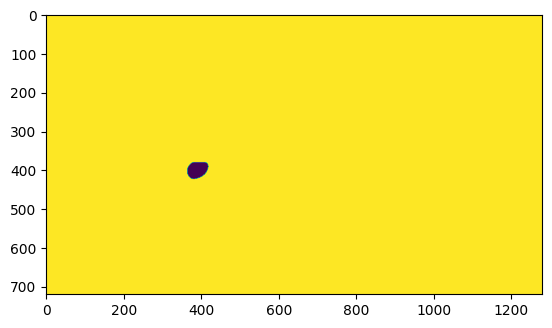

In [36]:

img2 = threshold
plt.imshow(img2)

In [37]:
x = img1.shape[0]
y = img1.shape[1]

In [38]:
for i in range(x):
  for j in range(y):
    if img2[i][j] == 255:
      img1[i][j] = 0

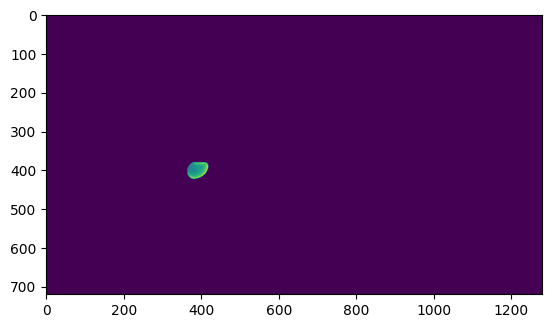

In [39]:
plt.imshow(img1)

In [40]:
cv.imwrite("coil1.jpg", img1)

True